In [102]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sc
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import preprocessing
%matplotlib inline

In [30]:
x = pd.read_csv('/content/ckd_full.csv')
x.head(20)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,73,?,1.01,1,0,?,?,notpresent,notpresent,95,51,1.6,142,3.5,?,?,?,?,no,no,no,good,no,no,ckd
1,62,?,1.015,3,0,abnormal,?,notpresent,notpresent,?,?,?,?,?,14.3,42,10200,4.8,yes,yes,no,good,no,no,ckd
2,50,?,?,?,?,normal,?,notpresent,notpresent,219,176,13.8,136,4.5,8.6,24,13200,2.7,yes,no,no,good,yes,yes,ckd
3,50,?,1.02,0,0,normal,normal,notpresent,notpresent,92,19,1.2,150,4.8,14.9,48,4700,5.4,no,no,no,good,no,no,notckd
4,35,?,1.02,0,0,normal,normal,?,?,99,30,0.5,135,4.9,15.4,48,5000,5.2,no,no,no,good,no,no,notckd
5,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,31,1.1,?,?,12.4,44,6900,5,no,yes,no,good,yes,no,ckd
6,14,?,1.015,0,0,?,?,notpresent,notpresent,192,15,0.8,137,4.2,14.3,40,9500,5.4,no,yes,no,poor,yes,no,ckd
7,8,?,?,?,?,?,?,notpresent,notpresent,80,66,2.5,142,3.6,12.2,38,?,?,no,no,no,good,no,no,ckd
8,5,?,1.015,1,0,?,normal,notpresent,notpresent,?,16,0.7,138,3.2,8.1,?,?,?,no,no,no,good,no,yes,ckd
9,4,?,1.02,1,0,?,normal,notpresent,notpresent,99,23,0.6,138,4.4,12,34,?,?,no,no,no,good,no,no,ckd


In [31]:
x.shape

(400, 25)

In [33]:
y=x[['class']]
y['class']=y['class'].replace(to_replace=(r'ckd',r'notckd'), value=(1,0))
x=x.iloc[:,:24]
x.head(1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,73,?,1.01,1,0,?,?,notpresent,notpresent,95,51,1.6,142,3.5,?,?,?,?,no,no,no,good,no,no


In [34]:
print(y)

     class
0        1
1        1
2        1
3        0
4        0
..     ...
395      1
396      1
397      1
398      1
399      1

[400 rows x 1 columns]


In [47]:
x[x=="?"]=np.nan
x['age'].isna().sum()

9

In [51]:
x['age'].fillna(x['age'].median(),inplace = True)
x['age'].isna().sum()

0

In [ ]:
x['age'].fillna(x['age'].median(),inplace = True)
x['age'].isna().sum()

In [52]:
x['bp'].fillna(x['bp'].median(),inplace = True)
x['bp'].isna().sum()

0

In [53]:
x['sg'].fillna(x['sg'].median(),inplace = True)
x['sg'].isna().sum()

0

In [68]:
a = np.array(x['al'])
r = sc.mode(a)
n = r[0]
x['al'].fillna(int(n),inplace = True)
x['al'].isna().sum()

0

In [69]:
a = np.array(x['su'])
r = sc.mode(a)
n = r[0]
x['su'].fillna(int(n),inplace = True)
x['su'].isna().sum()

0

In [73]:
def filstr(i):
    a = np.array(x[i])
    r = sc.mode(a)
    n = r[0]
    x[i].fillna(str(n),inplace = True)
    print(x[i].isna().sum())
filstr('rbc')    

0


In [74]:
filstr('pc')
filstr('pcc')
filstr('ba')
filstr('htn')
filstr('dm')
filstr('cad')
filstr('appet')
filstr('ane')
filstr('pe')

0
0
0
0
0
0
0
0
0


In [75]:
x['bgr'].fillna(x['bgr'].median(),inplace = True)
x['bgr'].isna().sum()

0

In [76]:
x['bu'].fillna(x['bu'].median(),inplace = True)
x['bu'].isna().sum()

0

In [77]:
x['sc'].fillna(x['sc'].median(),inplace = True)
x['sc'].isna().sum()

0

In [78]:
x['sod'].fillna(x['sod'].median(),inplace = True)
x['sod'].isna().sum()

0

In [79]:
x['pot'].fillna(x['pot'].median(),inplace = True)
x['pot'].isna().sum()

0

In [80]:
x['hemo'].fillna(x['hemo'].median(),inplace = True)
x['hemo'].isna().sum()

0

In [81]:
x['pcv'].fillna(x['pcv'].median(),inplace = True)
x['pcv'].isna().sum()

0

In [82]:
x['wbcc'].fillna(x['wbcc'].median(),inplace = True)
x['wbcc'].isna().sum()

0

In [83]:
x['rbcc'].fillna(x['rbcc'].median(),inplace = True)
x['rbcc'].isna().sum()

0

In [70]:
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,73,80,1.01,1,0,NaN,NaN,notpresent,notpresent,95,51,1.6,142,3.5,NaN,NaN,NaN,NaN,no,no,no,good,no,no
1,62,80,1.015,3,0,abnormal,NaN,notpresent,notpresent,NaN,NaN,NaN,NaN,NaN,14.3,42,10200,4.8,yes,yes,no,good,no,no
2,50,80,1.02,0,0,normal,NaN,notpresent,notpresent,219,176,13.8,136,4.5,8.6,24,13200,2.7,yes,no,no,good,yes,yes
3,50,80,1.02,0,0,normal,normal,notpresent,notpresent,92,19,1.2,150,4.8,14.9,48,4700,5.4,no,no,no,good,no,no
4,35,80,1.02,0,0,normal,normal,NaN,NaN,99,30,0.5,135,4.9,15.4,48,5000,5.2,no,no,no,good,no,no


In [88]:
le = preprocessing.LabelEncoder()
l = ['rbc','pc','pcc','ba','htn','dm','cad','appet','pe','ane']
for i in l:
    x[i]= le.fit_transform(x[i])
x.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,73,80,1.01,1,0,0,0,1,1,95,51,1.6,142,3.5,12.65,40,8000,4.8,1,1,1,1,1,1
1,62,80,1.015,3,0,1,0,1,1,121,42,1.3,138,4.4,14.3,42,10200,4.8,2,2,1,1,1,1
2,50,80,1.02,0,0,2,0,1,1,219,176,13.8,136,4.5,8.6,24,13200,2.7,2,1,1,1,2,2
3,50,80,1.02,0,0,2,2,1,1,92,19,1.2,150,4.8,14.9,48,4700,5.4,1,1,1,1,1,1
4,35,80,1.02,0,0,2,2,0,0,99,30,0.5,135,4.9,15.4,48,5000,5.2,1,1,1,1,1,1


In [89]:
scaler=StandardScaler()
scaled_data = scaler.fit_transform(x)
print(scaled_data.shape)

(400, 24)


In [90]:
pca=PCA(n_components=2)
x_pca = pca.fit_transform(scaled_data)

Text(0, 0.5, 'Second principle component')

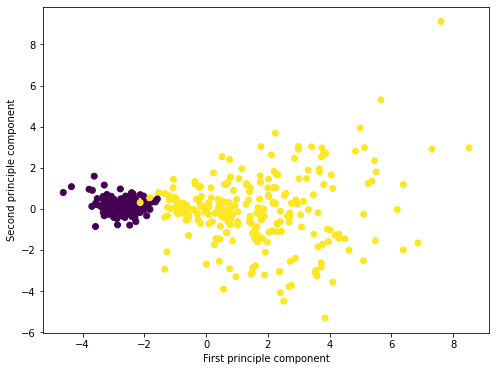

In [93]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=np.array(y))
plt.xlabel('First principle component')
plt.ylabel('Second principle component')

In [114]:
x.head(1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane
0,73,80,1.01,1,0,0,0,1,1,95,51,1.6,142,3.5,12.65,40,8000,4.8,1,1,1,1,1,1


In [154]:
df = pd.concat([x,y],axis=1)
df.head(1)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,73,80,1.01,1,0,0,0,1,1,95,51,1.6,142,3.5,12.65,40,8000,4.8,1,1,1,1,1,1,1


In [155]:
df.corr()

,rbc,pc,pcc,ba,htn,dm,cad,appet,pe,ane,class
rbc,1.000000,0.393821,0.002845,0.019199,-0.321229,-0.358417,-0.129224,-0.190258,-0.143371,-0.135308,-0.629978
pc,0.393821,1.000000,-0.136040,-0.088435,-0.344689,-0.364847,-0.154193,-0.172015,-0.244199,-0.233601,-0.403575
pcc,0.002845,-0.136040,1.000000,0.376102,0.206843,0.177564,0.184861,0.193949,0.113742,0.178299,0.289498
ba,0.019199,-0.088435,0.376102,1.000000,0.111083,0.101515,0.157115,0.155157,0.141271,0.064608,0.221212
htn,-0.321229,-0.344689,0.206843,0.111083,1.000000,0.622197,0.359231,0.344863,0.369831,0.346571,0.592895
dm,-0.358417,-0.364847,0.177564,0.101515,0.622197,1.000000,0.307705,0.325319,0.308890,0.187221,0.562271
cad,-0.129224,-0.154193,0.184861,0.157115,0.359231,0.307705,1.000000,0.159351,0.174382,0.054521,0.250040
appet,-0.190258,-0.172015,0.193949,0.155157,0.344863,0.325319,0.159351,1.000000,0.429592,0.272003,0.397072
pe,-0.143371,-0.244199,0.113742,0.141271,0.369831,0.308890,0.174382,0.429592,1.000000,0.225504,0.379163
ane,-0.135308,-0.233601,0.178299,0.064608,0.346571,0.187221,0.054521,0.272003,0.225504,1.000000,0.330260


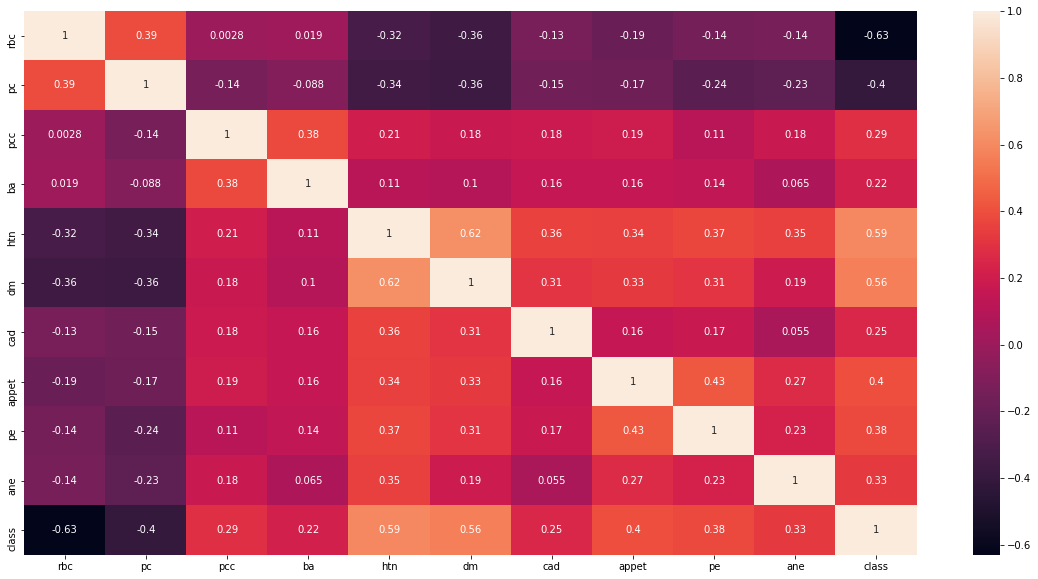

In [156]:
plt.figure(figsize=(20,10))
sns.heatmap(s.corr(),annot=True)

In [127]:

classifier = DecisionTreeClassifier(random_state = 0)
classifier.fit(x, y)
coef = classifier.feature_importances_
for i,v in zip(x.columns,coef):
	print(i,':',v*10)
    #print('Feature: %0d, Score: %.5f' % (i+1,v*10))

age : 0.0
bp : 0.0
sg : 1.6362962962962961
al : 0.0
su : 0.0
rbc : 0.0
pc : 0.0
pcc : 0.0
ba : 0.0
bgr : 0.12800000000000003
bu : 0.26474548922308344
sc : 0.00663063063062997
sod : 0.0
pot : 0.0
hemo : 7.126672891378773
pcv : 0.019934224973873406
wbcc : 0.0
rbcc : 0.5043871341640103
htn : 0.31333333333333374
dm : 0.0
cad : 0.0
appet : 0.0
pe : 0.0
ane : 0.0


In [108]:
  classifier.score(x,y)

1.0